In [2]:
import numpy as np
import pylab as pl
from skfdiff import Model, Simulation

In [3]:
Nx = 1000

x1 = -20.0
x2 = 20

U_i = 2.0
cu = 0.2
cd = -1.0
mu0 = 0.38
mu2 = -0.01

In [4]:
model = Model(["(-U_i * dxU + dxxU) + (2*cu * dxV - cd * dxxV) + (mu-cu*cu+mue*x)*U",
               "(-U_i * dxV + dxxV) + (-2*cu * dxU + cd * dxxU) + (mu-cu*cu+mue*x)*V"],
              ["U(x)", "V(x)"],
              parameters=["U_i", "cu", "cd", "mu","mue"])

In [5]:
x = np.linspace(x1,x2,num=Nx, dtype=np.float32)

In [6]:
n = 20
U = np.exp(-x**2)
V = np.exp(-x**2)

In [7]:
initial_fields = model.fields_template(x=x, U=U, V=V,U_i=U_i, cu=cu,cd=cd,mu=mu0,mue=mu2)

In [10]:
simulation = Simulation(model, initial_fields, dt=0.01, tmax=10)

In [11]:
container = simulation.attach_container()

In [12]:
simulation.run()


30deaa running: t: 10: : 1000it [04:19,  3.85it/s]                              


(9.999999999999831,
 <xarray.Dataset>
 Dimensions:  (x: 1000)
 Coordinates:
   * x        (x) float32 -20.0 -19.96 -19.92 -19.88 ... 19.88 19.92 19.96 20.0
 Data variables:
     U        (x) float64 -1.208e-05 -1.208e-05 -1.208e-05 ... 0.8669 0.8667
     V        (x) float64 -1.371e-05 -1.371e-05 -1.372e-05 ... 2.471 2.469 2.469
     U_i      float64 2.0
     cu       float64 0.2
     cd       float64 -1.0
     mu       float64 0.38
     mue      float64 -0.01)

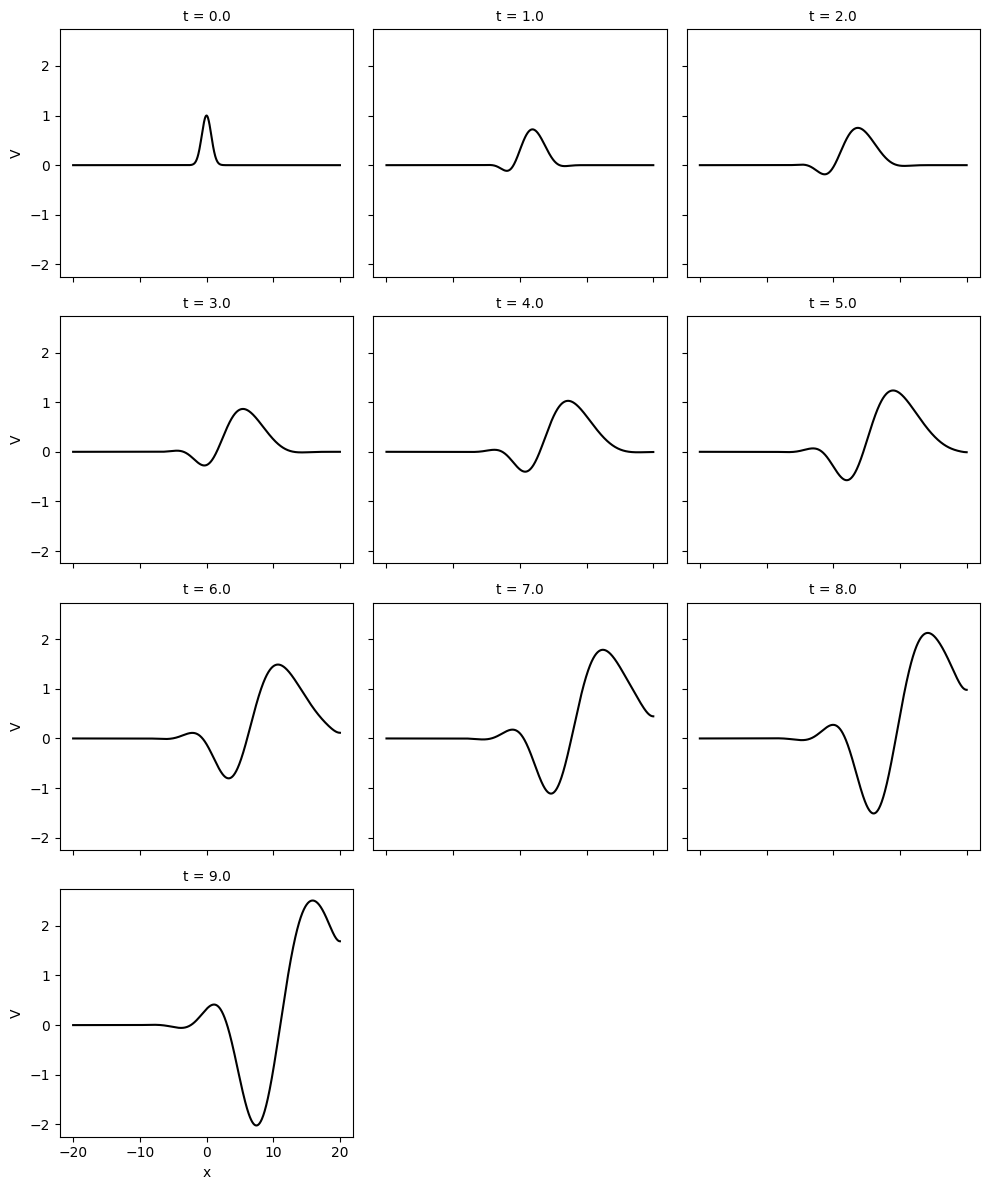

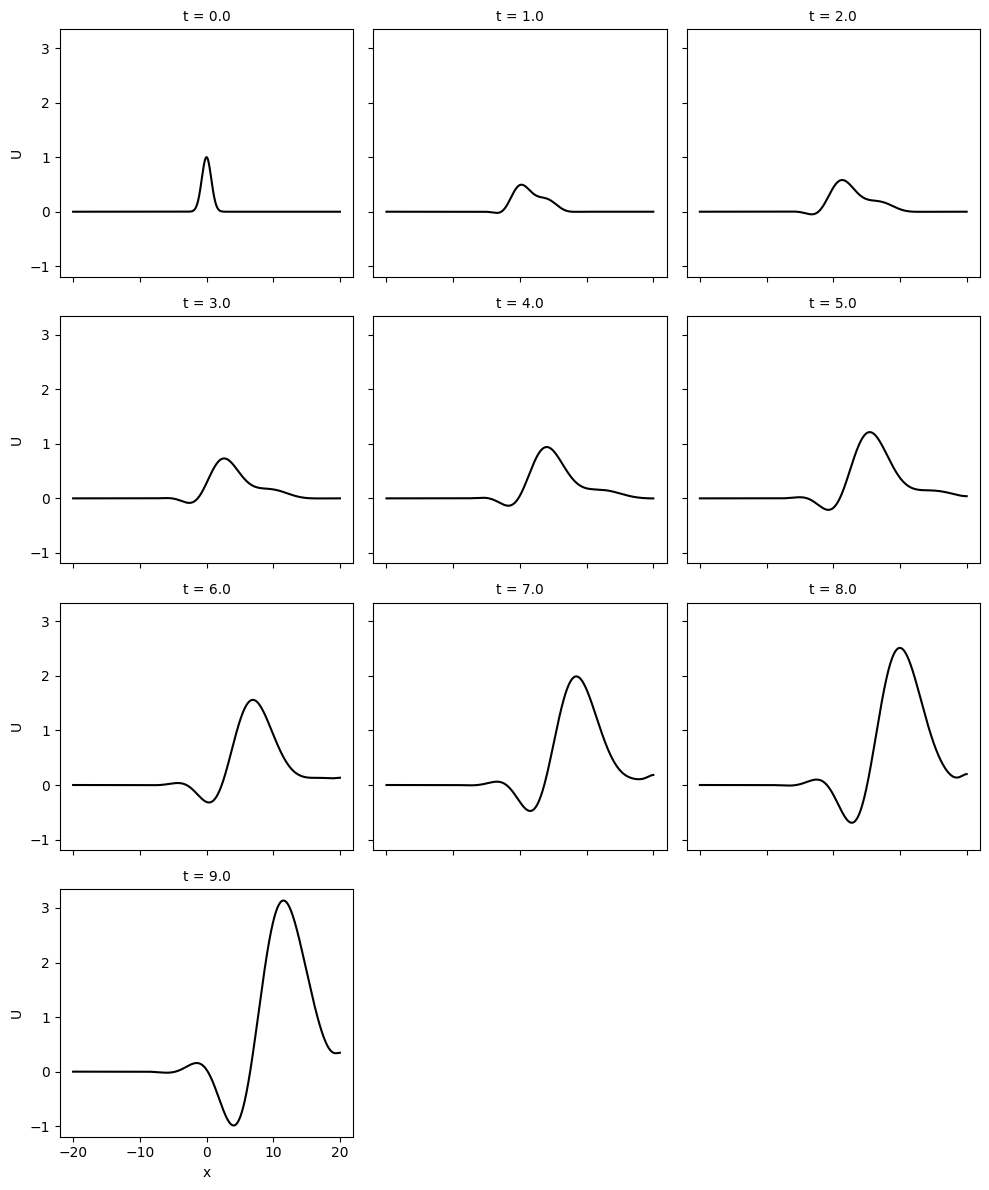

In [13]:
(
    container.data.V[: -2 : container.data.t.size // 10].plot(
        col="t", col_wrap=3, color="black"
    ),
    container.data.U[: -2 : container.data.t.size // 10].plot(
        col="t", col_wrap=3, color="black"
    )
)
pl.show()

In [14]:
data = container.data.copy()

In [24]:
data['U']

<xarray.DataArray 'U' (t: 1001, x: 1000)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.18878750e-05, -1.18877194e-05, -1.18869735e-05, ...,
         8.51576391e-01,  8.51237449e-01,  8.51135602e-01],
       [-1.19843694e-05, -1.19842186e-05, -1.19834861e-05, ...,
         8.59363894e-01,  8.59015784e-01,  8.58910842e-01],
       [-1.20816026e-05, -1.20814567e-05, -1.20807378e-05, ...,
         8.67210564e-01,  8.66853207e-01,  8.66745216e-01]])
Coordinates:
  * x        (x) float32 -20.0 -19.96 -19.92 -19.88 ... 19.88 19.92 19.96 20.0
  * t        (t) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99 10.0

In [23]:
data.to_netcdf('saved_on_disk.nc')